# ML Zoomcamp 2023 - Homework #2

Name: Wong Chee Fah

Email: wongcheefah@gmail.com

In [467]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [468]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
len(df)

20640

In [469]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Exploratory data analysis

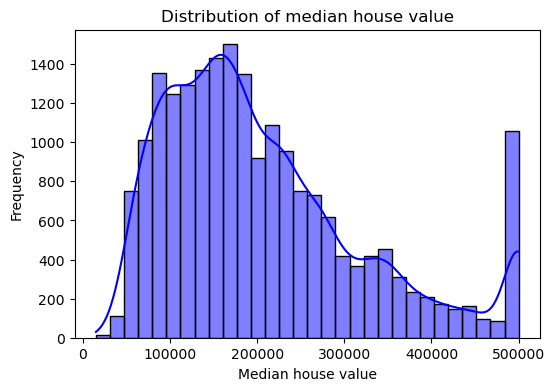

In [470]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=30, color='blue', alpha=0.5, kde=True)
plt.ylabel('Frequency')
plt.xlabel('Median house value')
plt.title('Distribution of median house value')

plt.show()

The median house value has a long tail on the right end, with a peak at the end.

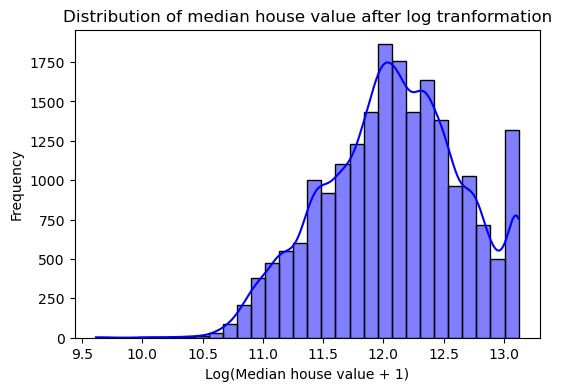

In [471]:
log_mhv = np.log1p(df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(log_mhv, bins=30, color='blue', alpha=0.5, kde=True)
plt.ylabel('Frequency')
plt.xlabel('Log(Median house value + 1)')
plt.title('Distribution of median house value after log tranformation')

plt.show()

After log transformation, the tail shifted to the left.

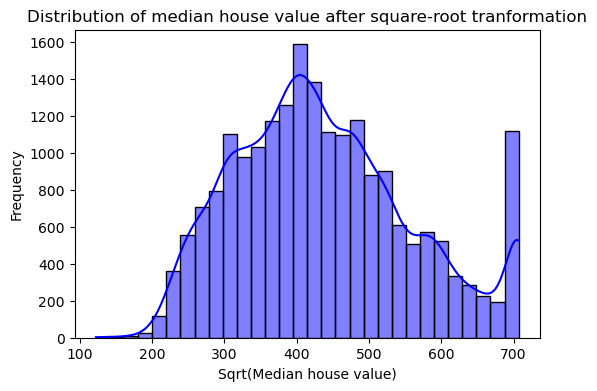

In [472]:
sqrt_mhv = np.sqrt(df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(sqrt_mhv, bins=30, color='blue', alpha=0.5, kde=True)
plt.ylabel('Frequency')
plt.xlabel('Sqrt(Median house value)')
plt.title('Distribution of median house value after square-root tranformation')

plt.show()

The distribution looks closer to normal with a square-root transformation.

### Preparing the dataset

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

- `'latitude'`,
- `'longitude'`,
- `'housing_median_age'`,
- `'total_rooms'`,
- `'total_bedrooms'`,
- `'population'`,
- `'households'`,
- `'median_income'`,
- `'median_house_value'`

In [473]:
df = df[df.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])].drop('ocean_proximity', axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1
##### There's one feature with missing values. What is it?

In [474]:
df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

['total_bedrooms']

##### Ans: total_bedrooms

## Question 2
##### What's the median (50% percentile) for variable `'population'`?

In [475]:
df.population.median()

1195.0

##### Ans: 1195

### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed `42`.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [476]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [477]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [478]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
20157,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080
20005,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
6691,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546
3470,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [479]:
print(df_train.shape, y_train.shape)
print(df_val.shape, y_val.shape)
print(df_test.shape, y_test.shape)

(9413, 8) (9413,)
(3137, 8) (3137,)
(3137, 8) (3137,)


## Question 3
- We have two options: fill it with 0 or with the mean of this variable.
- We need to deal with missing values for the column from Q1.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using `round(score, 2)`
- Which option gives better RMSE?

### Linear Regression

In [480]:
def prepare_X(df, base=None, fill_values=None):
    if type(base) == type(pd.Series()) or type(base) == type(pd.Index([])):
        base = base.tolist()
    elif base == None:
        base = df.columns
        
    if type(fill_values) == type(pd.Series()) or type(fill_values) == type(pd.Index([])):
        fill_values = fill_values.tolist()
    elif fill_values  == None:
        fill_values = [0]*len(base)
    
    df_num = df[base].copy()
    for i, col in enumerate(base):
        df_num[col] = df_num[col].fillna(fill_values[i])
    X = df_num.values
    return X

In [481]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [482]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Baseline solution

#### Fill missing values with zeros

In [483]:
X_train_zero = prepare_X(df_train)
w_0, w = train_linear_regression(X_train_zero, y_train)

In [484]:
y_pred_zero = w_0 + X_train_zero.dot(w)

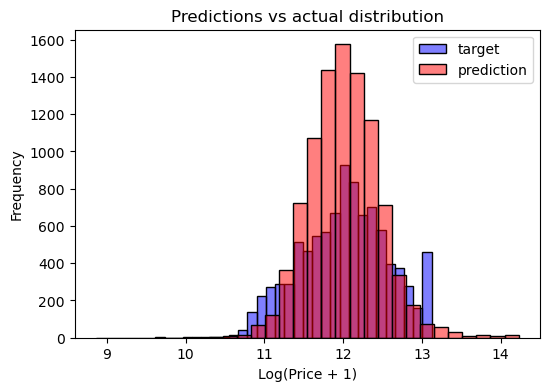

In [485]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.5, bins=30)
sns.histplot(y_pred_zero, label='prediction', color='red', alpha=0.5, bins=30)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [486]:
rmse_train_zero = rmse(y_train, y_pred_zero)

In [487]:
X_val_zero = prepare_X(df_val)
y_pred_zero = w_0 + X_val_zero.dot(w)

In [488]:
rmse_val_zero = rmse(y_val, y_pred_zero)

#### Fill missing values with mean

In [489]:
means = df_train.mean()
means

longitude             -119.212927
latitude                35.454722
housing_median_age      27.201955
total_rooms           2677.726548
total_bedrooms         542.552956
population            1476.874217
households             502.084458
median_income            3.806246
dtype: float64

In [490]:
X_train_mean = prepare_X(df_train, fill_values=means)
w_0, w = train_linear_regression(X_train_mean, y_train)

In [491]:
y_pred_mean = w_0 + X_train_mean.dot(w)

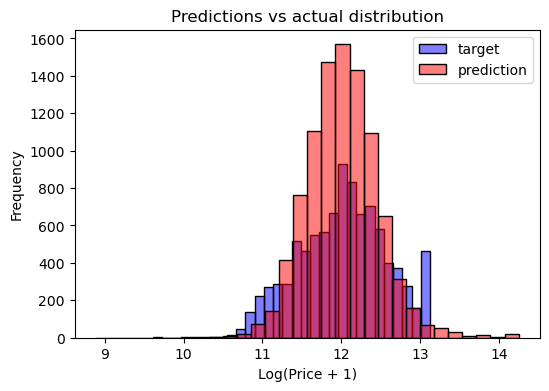

In [492]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.5, bins=30)
sns.histplot(y_pred_mean, label='prediction', color='red', alpha=0.5, bins=30)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [493]:
rmse_train_mean = rmse(y_train, y_pred_mean)

In [494]:
X_val_mean = prepare_X(df_val, fill_values=means)
y_pred_mean = w_0 + X_val_mean.dot(w)

In [495]:
rmse_val_mean = rmse(y_val, y_pred_mean)

In [496]:
print('Impute with zero')
print(f'RMSE of train set: {round(rmse_train_zero, 2)}')
print(f'RMSE of val set  : {round(rmse_val_zero, 2)}')
print()
print('Impute with mean')
print(f'RMSE of train set: {round(rmse_train_mean, 2)}')
print(f'RMSE of val set:   {round(rmse_val_mean, 2)}')

Impute with zero
RMSE of train set: 0.34
RMSE of val set  : 0.34

Impute with mean
RMSE of train set: 0.34
RMSE of val set:   0.34


##### Ans: Both are equally good

## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which `r` gives the best RMSE?

### Regularization

In [516]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [498]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print(f'r: {r}, w_0: {w_0}, w: {w}')
    
    y_pred = w_0 + X_train.dot(w)
    print('Train RMSE: ', rmse(y_train, y_pred))
    
    y_pred = w_0 + X_val.dot(w)
    print('Val RMSE:   ', rmse(y_val, y_pred))
    
    print()

r: 0, w_0: -9.763249477825628, w: [-2.55938802e-01 -2.68233309e-01  1.77710730e-03 -3.38393956e-05
  2.93766352e-04 -1.52190447e-04  3.96908643e-04  1.80600946e-01]
Train RMSE:  0.3402719715829533
Val RMSE:    0.3408479034159053

r: 1e-06, w_0: -9.763228830975615, w: [-2.55938574e-01 -2.68233130e-01  1.77710920e-03 -3.38394344e-05
  2.93766187e-04 -1.52190443e-04  3.96909047e-04  1.80600973e-01]
Train RMSE:  0.3402719715829849
Val RMSE:    0.34084790618218574

r: 0.0001, w_0: -9.761185235427776, w: [-2.55916002e-01 -2.68215347e-01  1.77729760e-03 -3.38432775e-05
  2.93749821e-04 -1.52190058e-04  3.96948960e-04  1.80603655e-01]
Train RMSE:  0.34027197189765446
Val RMSE:    0.3408481800557182

r: 0.001, w_0: -9.742646250116291, w: [-2.55711238e-01 -2.68054028e-01  1.77900669e-03 -3.38781406e-05
  2.93601353e-04 -1.52186566e-04  3.97311043e-04  1.80627981e-01]
Train RMSE:  0.3402720029336491
Val RMSE:    0.3408506921845961

r: 0.01, w_0: -9.561056193231325, w: [-2.53705567e-01 -2.66473898

In [499]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('Train RMSE: ', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Val RMSE:   ', rmse(y_val, y_pred))

Train RMSE:  0.3402719715829533
Val RMSE:    0.3408479034159053


In [500]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

print('     r    RMSE')
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, '  ', round(rmse(y_val, y_pred), 2))

     r    RMSE
     0    0.34
 1e-06    0.34
0.0001    0.34
 0.001    0.34
  0.01    0.34
   0.1    0.34
     1    0.34
     5    0.35
    10    0.35


### Ans: r=0

## Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
- Round the result to 3 decimal digits (`round(std, 3)`)

In [511]:
rmse_list = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train_zero = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train_zero, y_train)

    X_val_zero = prepare_X(df_val)
    y_pred_zero = w_0 + X_val_zero.dot(w)
    
    rmse_list.append(rmse(y_val, y_pred_zero))
    
print(f'Standard deviation of all RMSE scores: {round(np.std(rmse_list), 3)}')

Standard deviation of all RMSE scores: 0.005


### Ans: 0.005

## Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with `r=0.001`.
- What's the RMSE on the test dataset?

In [524]:
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_full_train = pd.concat([df_train, df_val])

y_full_train_orig = df_full_train.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_full_train = np.log1p(df_full_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_full_train['median_house_value']
del df_test['median_house_value']

X_full_train = prepare_X(df_full_train)

w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)

print(f'Test dataset RMSE: {round(rmse(y_test, y_pred), 2)}')

Test dataset RMSE: 0.33


### Ans: 0.33